# Big-Data for Computational Finance - Assignment 1

## Introduction

### Project Objectives
The  objective of this project is to implement and solve the Markowitz portfolio optimization model using Python. This involves formulating the problem as a quadratic optimization task and exploring various constraints to analyze their impact on the efficient frontier.

### Tasks and Requirements
The project consists of the following tasks:

1. **Task 1: Solve the Original Problem**
   - Formulate and solve the Markowitz portfolio optimization problem with the standard constraints.
   - Plot the efficient frontier for different expected returns.

2. **Task 2: Modify the Investment Constraint**
   - Modify the total investment constraint to \(\mathbf{e}^T \mathbf{x} \leq 1\) and solve the optimization problem.
   - Compare the results with the original problem.

3. **Task 3: Change the Return Constraint**
   - Change the return constraint to \(\boldsymbol{\mu}^T \mathbf{x} \geq r\) and solve the optimization problem.
   - Analyze the impact of this modification on the efficient frontier.

4. **Task 4: Allow Short Selling**
   - Remove the non-negativity constraint (\(\mathbf{x} \geq \mathbf{0}\)) to allow short selling.
   - Solve the optimization problem and compare the results with previous tasks.

### Theoretical Foundation
The Markowitz model, also known as the mean-variance optimization model, aims to determine the optimal allocation of capital across a set of assets. The goal is to minimize the portfolio's risk (variance) for a given level of expected return. This optimization problem can be expressed mathematically as:

\[ 
\begin{align*}
\text{Minimize} & \quad \mathbf{x}^T \mathbf{C} \mathbf{x} \\
\text{Subject to} & \quad \boldsymbol{\mu}^T \mathbf{x} = r \\
& \quad \mathbf{e}^T \mathbf{x} = 1 \\
& \quad \mathbf{x} \geq \mathbf{0}
\end{align*}
\]

Where:
- \(\mathbf{x}\) is the vector of asset weights.
- \(\mathbf{C}\) is the covariance matrix of asset returns.
- \(\boldsymbol{\mu}\) is the vector of expected returns.
- \(r\) is the desired portfolio return.
- \(\mathbf{e}\) is a vector of ones ensuring the sum of weights is equal to 1.



# Importing Necessary Libraries

In [21]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import cvxpy as cp

# Task no # 1 


###  Generate 𝜇 and C

In [28]:
# Registration numbere is 2320908  so dig1 =0 and dig2 =8  
dig1 = 0
dig2 = 8
dumy_repetition = 10 * dig1 + dig2 

for i in range(dumy_repetition):
    dummy = random.uniform(0, 1)

n = 10
Cr = np.array([[0]*n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Cr[i][j] = (-1)**abs(i-j) / (abs(i-j) + 1)

sigma = np.array([[0]*1 for i in range(n)], dtype=float)
mu = np.array([[0]*1 for i in range(n)], dtype=float)

sigma[0] = 2 
mu[0] = 3 

for k in range(n-1):
    sigma[k+1] = sigma[k] + 2 * random.uniform(0, 1)
    mu[k+1] = mu[k] + 1

diag = np.array([[0]*n for _ in range(n)], dtype=float)
np.fill_diagonal(diag, sigma.flatten())

C2 = np.matmul(np.matmul(diag, Cr), diag)
C = 0.5 * (C2 + C2.T)
mu = mu.flatten()

print("Expected Returns=\n", mu)
print("Covariance Matrix=\n", C) 

Expected Returns=
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Covariance Matrix=
 [[  4.          -3.62410846   3.03980317  -3.24198609   2.94232824
   -2.89206272   2.92088824  -2.83663443   2.62860623  -2.65027061]
 [ -3.62410846  13.13416212  -8.26243228   7.83287281  -6.66457291
    6.28868939  -6.17494255   5.87444047  -5.35857417   5.33603785]
 [  3.03980317  -8.26243228  20.7909074  -14.78249938  11.18012336
   -9.89021411   9.3228716   -8.62281032   7.7050725   -7.55278218]
 [ -3.24198609   7.83287281 -14.78249938  42.04189527 -23.84746805
   18.75205426 -16.57158836  14.71412699 -12.78285727  12.27448637]
 [  2.94232824  -6.66457291  11.18012336 -23.84746805  54.10809657
  -31.91024181  25.06645154 -20.86577395  17.40200027 -16.24576261]
 [ -2.89206272   6.28868939  -9.89021411  18.75205426 -31.91024181
   75.27624122 -44.34880807  32.81489879 -25.6570676   22.99424653]
 [  2.92088824  -6.17494255   9.3228716  -16.57158836  25.06645154
  -44.34880807 104.51195467 -57.99844511  

### Solve the Optimization Problem for 29 Values of 𝑟

In [29]:
# Given values of r
r_values = np.arange(2.00, 9.25, 0.25)
sigmas = []
mus = []

# Define the number of assets
n = len(mu)

# Solve the problem for each r
for i in r_values:
    # Define the optimization variables
    x = cp.Variable(n)
    
    # Define the objective function (minimize variance)
    obj = cp.Minimize(cp.quad_form(x, C))
    
    # Define the constraints
    const = [
        mu.T @ x == i,
        cp.sum(x) == 1,
        x >= 0
    ]
    
    # Form and solve the problem
    problem = cp.Problem(obj, const)
    problem.solve()
    
     # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma = np.nan
        mu_x = np.nan

    # Store the values
    sigmas.append(round(sigma,2))
    mus.append(round(mu_x,2))

# Convert lists to numpy arrays
sigmas = np.array(sigmas)
mus = np.array(mus)

t1_p1 = sigmas
t1_p2 = mus

# Task # 1 
# **Plot**

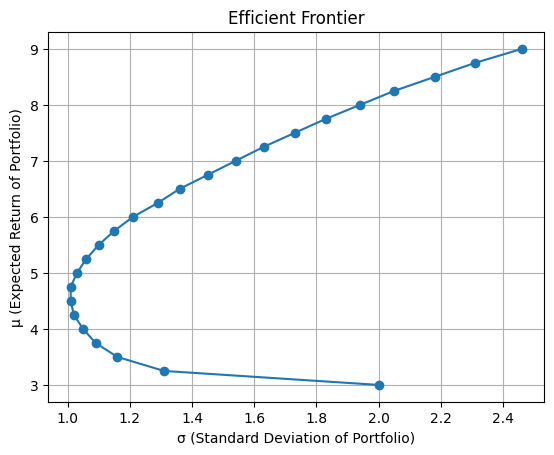

In [30]:
# Plot the results
#plt.figure(figsize=(10, 6))
plt.plot(t1_p1, t1_p2, marker='o')
plt.xlabel('σ (Standard Deviation of Portfolio)')
plt.ylabel('μ (Expected Return of Portfolio)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

# Task no # 2

In [31]:
# Number of assets
n = 10
# Registration numbere is 2320908  so dig1 =0 and dig2 =8
dig1 = 0  
dig2 = 8
dummy_repetitions = 10 * dig1 + dig2

# Perform dummy repetitions
for _ in range(dummy_repetitions):
    dummy = random.uniform(0, 1)
# Generate the correlation matrix Corr
Cr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Cr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

# Generate the standard deviations ssigma and expected returns mmu
sigma = np.zeros((n, 1), dtype=float)
mu = np.zeros((n, 1), dtype=float)
sigma[0] = 2
mu[0] = 3
for i in range(n - 1):
    sigma[i + 1] = sigma[i] + 2 * random.uniform(0, 1)
    mu[i + 1] = mu[i] + 1

# Generate the diagonal matrix ddiag
diag = np.zeros((n, n), dtype=float)
np.fill_diagonal(diag, sigma.flatten())

# Calculate the covariance matrix C2 and the final matrix C
C2 = np.matmul(np.matmul(diag, Cr), diag)
C = 0.5 * (C2 + C2.T)

# Convert mmu to a 1D array for easier use in the optimization
mu = mu.flatten()

# Define the vector e
e = np.ones(n)

# Define the range of r values
r_values = np.arange(2.0, 9.25, 0.25)  # series of r increasing 0.25 from question

# Initialize lists to store sigma and mu values
sigma_values = []
mu_values = []

# Solve the optimization problem for each r
for r in r_values:
    # Define the optimization variable
    x = cp.Variable(n)

    # Define the objective function (minimize variance)
    obj = cp.Minimize(cp.quad_form(x, C))

    # Define the constraints
    const = [
        mu.T @ x == r,  # Expected return constraint
        e.T @ x <= 1,   # Sum of fractions constraint allowing for less than full investment
        x >= 0          # No short-selling constraint
    ]

    # Define the problem
    problem = cp.Problem(obj, const)

    # Solve the problem
    problem.solve()

    # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma_x = np.nan
        mu_x = np.nan

    # Store the values
    sigma_values.append(round(sigma_x,2))
    mu_values.append(round(mu_x,2))

# Convert lists to numpy arrays for plotting
sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)

t2_p1 = sigma_values
t2_p2 = mu_values


# Task # 2 
# **Plot**

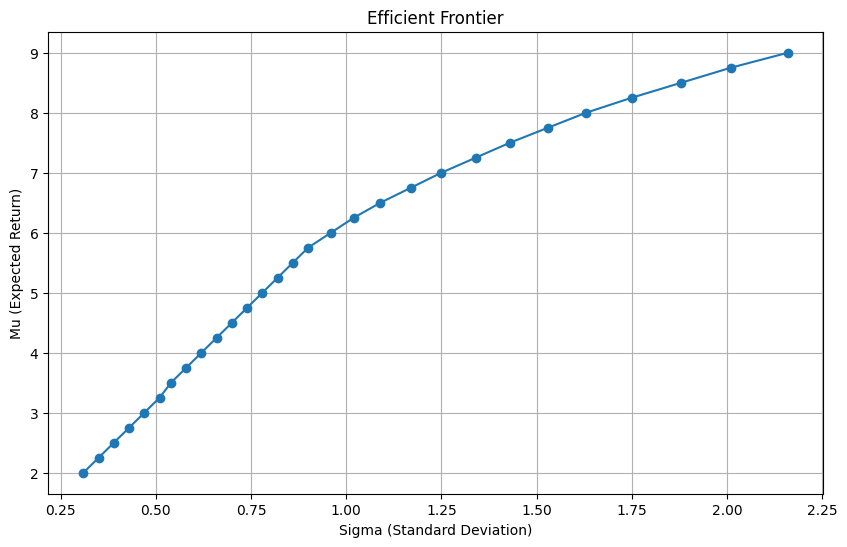

In [37]:
## Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t2_p1, t2_p2, marker='o')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

# Comparing plots of Task 1 and Task 2

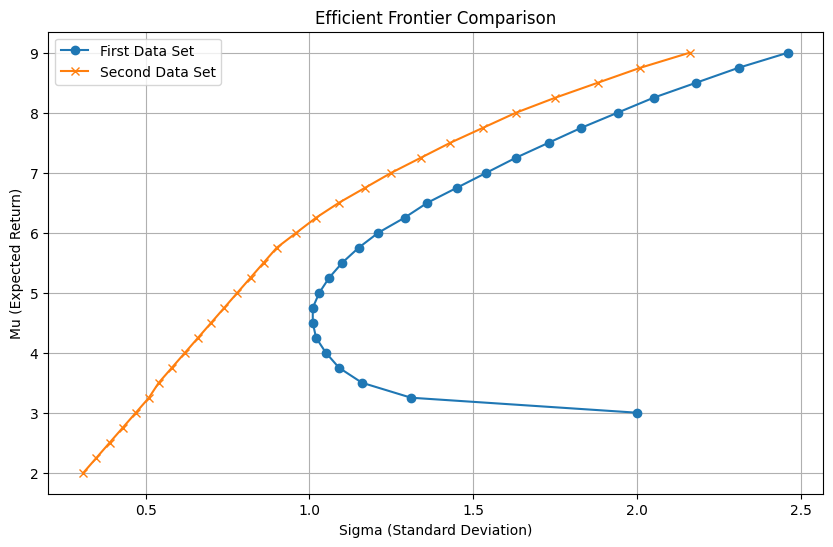

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(t1_p1, t1_p2, marker='o', label='First Data Set')
plt.plot(t2_p1, t2_p2, marker='x', label='Second Data Set')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier Comparison')
plt.grid(True)
plt.legend()
plt.show()      

# *The updated plot still compares the efficient frontiers of two data sets: the blue line for the first and the orange line for the second. Despite slight changes in σ values, the overall comparison remains the same. The blue frontier remains broader and more curved, indicating a wider range of μ and σ, while the orange frontier is more linear and constrained. Both frontiers intersect around the same point, showing similar risk-return combinations there. Beyond this, the blue frontier continues to offer higher returns for the same risk, indicating more aggressive investment options compared to the more stable, conservative options suggested by the orange frontier.*

# Task no # 3

In [34]:
# Number of assets
n = 10
# Registration numbere is 2320908  so dig1 =0 and dig2 =8
dig1 = 0
dig2 = 8
dummy_repetitions = 10 * dig1 + dig2

# Perform dummy repetitions
for _ in range(dummy_repetitions):
    dummy = random.uniform(0, 1)

# Generate the correlation matrix Corr
Cr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Cr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

# Generate the standard deviations ssigma and expected returns mmu
sigma = np.zeros((n, 1), dtype=float)
mu = np.zeros((n, 1), dtype=float)
sigma[0] = 2
mu[0] = 3
for i in range(n - 1):
    sigma[i + 1] = sigma[i] + 2 * random.uniform(0, 1)
    mu[i + 1] = mu[i] + 1

# Generate the diagonal matrix ddiag
diag = np.zeros((n, n), dtype=float)
np.fill_diagonal(diag, sigma.flatten())

# Calculate the covariance matrix C2 and the final matrix C
C2 = np.matmul(np.matmul(diag, Cr), diag)
C = 0.5 * (C2 + C2.T)

# Convert mmu to a 1D array for easier use in the optimization
mu = mu.flatten()

# Define the vector e
e = np.ones(n)

r_values = np.arange(2.0, 9.25, 0.25)  # series of r increasing 0.25 from question

# Initialize lists to store sigma and mu values
sigma_values = []
mu_values = []

# Solve the optimization problem for each r
for r in r_values:
    # Define the optimization variable
    x = cp.Variable(n)

    # Define the objective function (minimize variance)
    obj = cp.Minimize(cp.quad_form(x, C))

    # Define the constraints
    const = [
        mu.T @ x >= r,  # Expected return constraint (at least r)
        e.T @ x == 1,   # Sum of fractions constraint
        x >= 0          # No short-selling constraint
    ]

    # Define the problem
    problem = cp.Problem(obj, const)

    # Solve the problem
    problem.solve()

    # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma_x = np.nan
        mu_x = np.nan

    # Store the values
    sigma_values.append(sigma_x)
    mu_values.append(mu_x)

# Convert lists to numpy arrays for plotting
sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)

t3_p1 = sigma_values
t3_p2 = mu_values

# Task # 3
# **Plot**

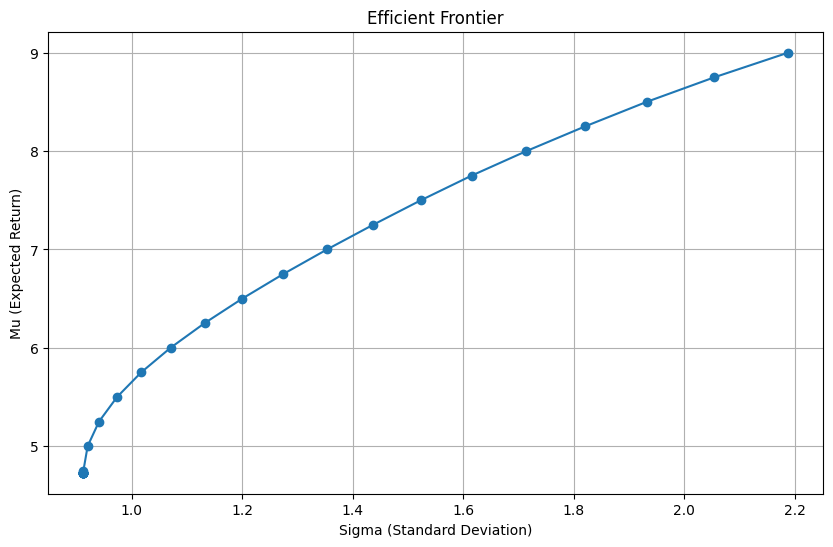

In [35]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t3_p1, t3_p2, marker='o')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

# Comparing plots of Task 1 and Task 3

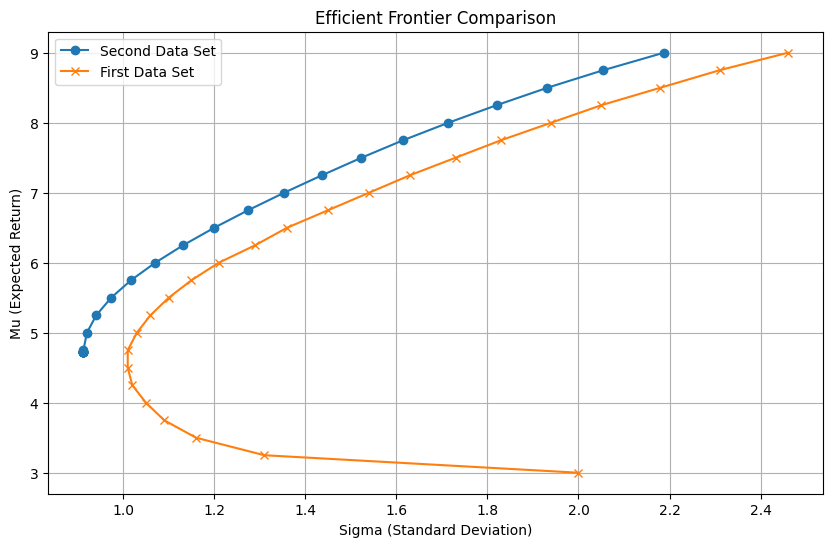

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(t3_p1, t3_p2, marker='o', label='Second Data Set')
plt.plot(t1_p1, t1_p2, marker='x', label='First Data Set')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier Comparison')
plt.grid(True)
plt.legend()
plt.show()

# *This plot compares the efficient frontiers of two data sets, with the first data set in orange and the second in blue. The orange frontier shows a more pronounced curve, indicating a wider range of expected returns (μ) and standard deviations (σ). In contrast, the blue frontier displays a more linear progression, suggesting a narrower and more stable range of μ and σ. Despite slight changes in σ values, the orange frontier still highlights more aggressive, higher-return investments, while the blue frontier offers more conservative, stable options. The overall comparison remains valid, emphasizing the differences in investment strategies between the two data sets.  *

# Task no # 4

In [100]:
# Number of assets
n = 10
# Registration numbere is 2320908  so dig1 =0 and dig2 =8
dig1 = 0  
dig2 = 8
dummyrepetitions = 10 * dig1 + dig2

# Perform dummy repetitions
for _ in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

# Generate the correlation matrix Corr
Corr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

# Generate the standard deviations ssigma and expected returns mmu
ssigma = np.zeros((n, 1), dtype=float)
mmu = np.zeros((n, 1), dtype=float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

# Generate the diagonal matrix ddiag
ddiag = np.zeros((n, n), dtype=float)
np.fill_diagonal(ddiag, ssigma.flatten())

# Calculate the covariance matrix C2 and the final matrix C
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5 * (C2 + C2.T)

# Convert mmu to a 1D array for easier use in the optimization
mu = mmu.flatten()

# Define the vector e
e = np.ones(n)

# Define the range of r values
r_values = np.arange(2.0, 9.25, 0.25)  # series of r increasing 0.25 from question

# Initialize lists to store sigma and mu values
sigma_values = []
mu_values = []

# Solve the optimization problem for each r
for r in r_values:
    # Define the optimization variable
    x = cp.Variable(n)

    # Define the objective function (minimize variance)
    obj = cp.Minimize(cp.quad_form(x, C))

    # Define the constraints
    const = [
        mu.T @ x == r,  # Expected return constraint
        e.T @ x == 1    # Sum of fractions constraint
        # Removed x >= 0 to allow short-selling
    ]

    # Define the problem
    problem = cp.Problem(obj, const)

    # Solve the problem
    problem.solve()

    # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma_x = np.nan
        mu_x = np.nan

    # Store the values
    sigma_values.append(sigma_x)
    mu_values.append(mu_x)

# Convert lists to numpy arrays for plotting
sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)

t4_p1 = sigma_values
t4_p2 = mu_values

# Task # 4
# **Plot**

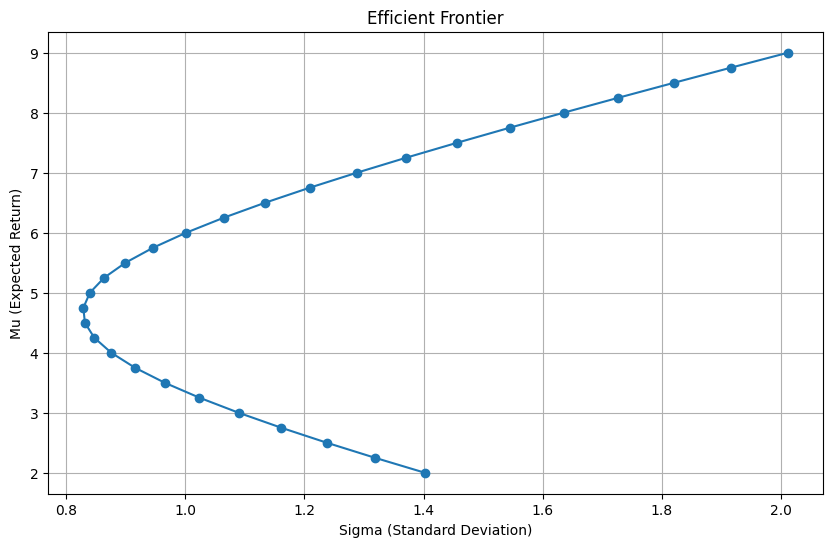

In [101]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t4_p1, t4_p2, marker='o')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

# Comparing plots of Task 1 and Task 4

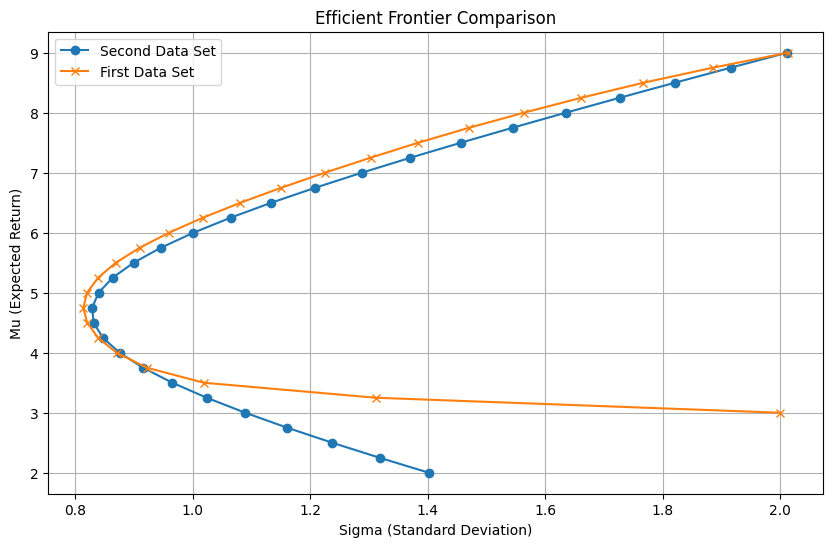

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(t4_p1, t4_p2, marker='o', label='Second Data Set')
plt.plot(t1_p1, t1_p2, marker='x', label='First Data Set')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier Comparison')
plt.grid(True)
plt.legend()
plt.show()

# *The figure compares the efficient frontiers of two data sets, with the first data set in orange and the second in blue. The orange frontier showing a pronounced curve. The blue frontier also curving but with a different pattern. They intersect around  μ = [4,5]. Beyond this point, the orange frontier offers higher returns for increasing risk levels.while the blue frontier declines. This suggests that the first data set (orange) offers higher returns for a wider range of risk, while the second (blue) declines beyond a certain risk, indicating a more conservative approach.*